# EPR-type entanglement of NDPA

$$\def \lk{\left(}
\def \rk{\right)}
\def \frop#1{\hat{\tilde{#1}}}
\def\thetap{\theta^\prime}
\def\ul#1{\underline{#1}}
\def\frvecop#1{\hat{\tilde{\underline{#1}}}}
\def\dul#1{\underline{\underline{#1}}}
\def\frmat#1{\tilde{\dul{#1}}}
\def\lk{\left(}
\def\rk{\right)}
\def\lka{\left\{}
\def\rka{\right\}}
\def\lsz{\left[}
\def\rsz{\right]}
\def\bra{\left\langle}
\def\ket{\right\rangle}$$

## Intracavity field
$$\begin{align}
\frop{a} &= \lk\nu\dul{\mathbb{1}} - \dul{\Delta} + i\sqrt{2\pi}\frmat{f}\rk^{-1}\frop{B} = 
\frmat{N}\ \frop{B} \\
\dul{\Delta} &= \left(\begin{matrix} 
(-i\kappa_a+\Delta) & 0 & ig & i\epsilon \\
0 & (-i\kappa_a-\Delta) & i\epsilon^* & ig^* \\
-ig^* & i\epsilon & (-i\kappa_b-\Delta) & 0 \\
i\epsilon^* & -ig & 0 & (-i\kappa_b+\Delta)\end{matrix}\right)\\
\sqrt{2\pi}\frmat{f} &= diag \left(k_ae^{i(\nu\tau_a+\phi_a)},k_ae^{i(\nu\tau_a-\phi_a)},k_be^{i(\nu\tau_b+\phi_b)},k_be^{i(\nu\tau_b-\phi_b)}\right) =\\
& =diag \left(k_a,k_a,k_b,k_b\right)\cdot diag \left(e^{i(\nu\tau_a+\phi_a)},e^{i(\nu\tau_a-\phi_a)},e^{i(\nu\tau_b+\phi_b)},e^{i(\nu\tau_b-\phi_b)}\right)=\\
&=\dul{K}\,\frmat{f}_N
\end{align}$$

### Input field
$$\begin{align}
\frvecop{B} &= -i\lsz\lk\dul{\kappa}_1+\sqrt{2\pi}\, \dul{\kappa}_2\,\dul{L}_2\,\frmat{f}_N\rk\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\frvecop{\xi} \rsz = -i\lk\frmat{A}_1\,\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\,\frvecop{\xi}\rk\\
\dul{\kappa}_n &= diag(\sqrt{2\kappa_{n,a}},\sqrt{2\kappa_{n,a}},\sqrt{2\kappa_{n,b}},\sqrt{2\kappa_{n,b}})\\
\dul{L}_1 &= diag(\sqrt{L_a},\sqrt{L_a},\sqrt{L_b},\sqrt{L_b})\\
\dul{L}_2 &= diag(\sqrt{1-L_a},\sqrt{1-L_a},\sqrt{1-L_b},\sqrt{1-L_b})\\
\frmat{A}_1 &= diag\lk\alpha_1(\nu),\alpha^*_1(-\nu),\beta_1(\nu),\beta^*_1(-\nu)\rk \text{ where, } \alpha_1(\nu) = \frac{1}{\sqrt{2\kappa_{1,a}}}\lk 2\kappa_{1,a}+k_a e^{i\lk\nu\tau_a+\phi_a\rk}\rk
\end{align}$$
where $\frvecop{a}_{1,in}$ and $\frvecop{\xi}$ represent vacuum fields.

Therefore, the intracavity field has the following form:
$$\frvecop{a} = -i\frmat{N}\lk\frmat{A}_1\,\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\,\frvecop{\xi}\rk$$

In [1]:
from sympy import *
import numpy as np
from IPython.display import display, Math, Latex
init_printing(use_unicode=True)

In [2]:
from sympy.assumptions.assume import global_assumptions
from sympy.solvers.solvers import check_assumptions

dma,dmb,dpa,dpb,eps,Lab,Lba = \
symbols('d_-a d_-b d_+a d_+b \epsilon \Lambda_ab \Lambda_ba')

ka,kb,ta,tb,phia,phib,La,Lb,kap1a,kap2a,kap1b,kap2b,Del =\
symbols('k_a k_b \\tau_a \\tau_b \phi_a \phi_b L_a,L_b,\kappa_1a \kappa_2a \kappa_1b \kappa_2b \Delta')

xia,xida,xib,xidb,a1in,ad1in,b1in,bd1in,nu = \
symbols('\\xi_a \\xi^+_a \\xi_b \\xi^+_b a_1in a^+_1in b_1in b^+_1in \\nu')

taua,taub = symbols('\\tau_a \\tau_b')

alpha1, beta1 = symbols('\\alpha_1 \\beta_1')

kap1 = diag(sqrt(2*kap1a),sqrt(2*kap1a),sqrt(2*kap1b),sqrt(2*kap1b))
kap2 = diag(sqrt(2*kap2a),sqrt(2*kap2a),sqrt(2*kap2b),sqrt(2*kap2b))
L1   = diag(sqrt(La),sqrt(La),sqrt(Lb),sqrt(Lb))
L2   = diag(sqrt(1-La),sqrt(1-La),sqrt(1-Lb),sqrt(1-Lb))
K    = diag(ka,ka,kb,kb)
ftil = diag(exp(I*(nu*ta+phia)),exp(I*(nu*ta-phia)),exp(I*(nu*tb+phib)),exp(I*(nu*tb-phib)))
ain  = Matrix([a1in,ad1in,b1in,bd1in])
xi   = Matrix([xia,xida,xib,xidb])

A    = -I*diag(alpha1,conjugate(alpha1),beta1,conjugate(beta1)) #A = -i*A1
S    = -I*kap2*L1                                               #S = -i*kappa2*L1

N    = I*Matrix([[dpb/Lba,0,0,eps/Lba],[0,dmb/Lab,conjugate(eps)/Lab,0],\
              [0,eps/Lab,dpa/Lab,0],[conjugate(eps)/Lba,0,0,dma/Lba]])

The input field B has the following form:

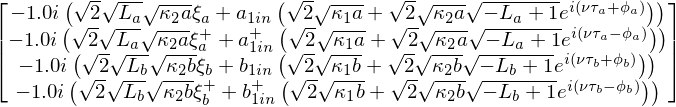

In [3]:
B    = -1j*((kap1+kap2*ftil*L2)*ain + kap2*L1*xi)
B

which is the same as (with the notation shown above)

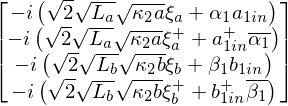

In [4]:
simplify(A*ain+S*xi)

### Intracavity field

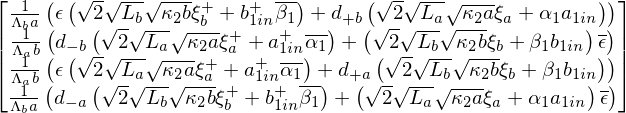

In [5]:
a = (N*(A*ain+S*xi))
simplify(a)

So we have the following equations for the intracavity field:
$$\begin{align}
\frop{a}(\nu) &= \frac{1}{\Lambda_{ba}(\nu)}\lsz d_{+b}(\nu) \alpha_1(\nu) \frop{a}_{1,in}(\nu)+\epsilon\beta_1^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left. \sqrt{2\kappa_{2,a}L_a}d_{+b}(\nu)\frop{\xi}_a(\nu) +  \sqrt{2\kappa_{2,b}L_b}\epsilon\frop{\xi}^\dagger_b(-\nu) \rsz\\
\frop{a}^\dagger(-\nu) &=\frac{1}{\Lambda_{ab}(\nu)}\lsz d_{-b}(\nu) \alpha_1^*(-\nu) \frop{a}^\dagger_{1,in}(-\nu)+\epsilon^*\beta_1(\nu)\frop{b}_{1,in}(\nu)+\right.\\
&\quad\left. \sqrt{2\kappa_{2,a}L_a}d_{-b}(\nu)\frop{\xi}^\dagger_a(-\nu) +  \sqrt{2\kappa_{2,b}L_b}\epsilon^*\frop{\xi}_b(\nu) \rsz\\
\frop{b}(\nu) &=\frac{1}{\Lambda_{ab}(\nu)}\lsz \epsilon \alpha_1^*(-\nu) \frop{a}^\dagger_{1,in}(-\nu)+d_{+a}(\nu)\beta_1(\nu)\frop{b}_{1,in}(\nu)+\right.\\
&\quad\left. \sqrt{2\kappa_{2,b}L_b}d_{+a}(\nu)\frop{\xi}_b(\nu) +  \sqrt{2\kappa_{2,a}L_a}\epsilon\frop{\xi}^\dagger_a(-\nu) \rsz\\
\frop{b}^\dagger(-\nu) &=\frac{1}{\Lambda_{ba}(\nu)}\lsz \epsilon^* \alpha_1(\nu) \frop{a}_{1,in}(\nu)+d_{-a}(\nu)\beta_1^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left. \sqrt{2\kappa_{2,b}L_b}d_{-a}(\nu)\frop{\xi}^\dagger_b(-\nu) +  \sqrt{2\kappa_{2,a}L_a}\epsilon^*\frop{\xi}_a(\nu) \rsz
\end{align}$$

## Output field
$$\begin{align}
\hat{\tilde{\underline{a}}}_{2,out} &= \hat{\tilde{\underline{a}}}_{2,in} + \dul{\kappa}_2\hat{\tilde{\underline{a}}} = \sqrt{2\pi}\dul{L}_2\frmat{f}_N\lk\frvecop{a}_{1,in}+\dul{\kappa}_1\frvecop{a}\rk + \dul{L}_1\frvecop{\xi}+\dul{\kappa}_2\hat{\tilde{\underline{a}}}=\\
&= \sqrt{2\pi}\dul{L}_2\frmat{f}_N\frvecop{a}_{1,in}+\dul{L}_1\frvecop{\xi}-i\lk\sqrt{2\pi}\dul{L}_2\frmat{f}_N\dul{\kappa}_1 + \dul{\kappa}_2\rk\frmat{N}\lk\frmat{A}_1\,\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\,\frvecop{\xi}\rk =\\
&= \lsz\sqrt{2\pi}\dul{L}_2\ \frmat{f}_N -i\lk\sqrt{2\pi}\dul{L}_2\ \frmat{f}_N\dul{\kappa}_1 + \dul{\kappa}_2\rk\frmat{N}\ \frmat{A}_1\rsz\frvecop{a}_{1,in}+\lsz\dul{\mathbb{1}}-i\lk\sqrt{2\pi}\dul{L}_2\ \frmat{f}_N\dul{\kappa}_1 + \dul{\kappa}_2\rk\frmat{N}\ \dul{\kappa}_2\rsz\dul{L}_1\frvecop{\xi}=\\
&=\frmat{O}_1\frvecop{a}_{1,in}+\frmat{O}_2\frvecop{\xi}
\end{align}$$

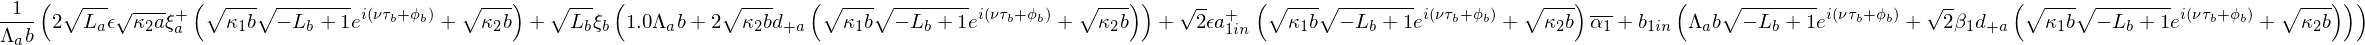

In [6]:
O1 = L2*ftil+(L2*ftil*kap1+kap2)*N*A
O2 = (np.identity(4)-I*(L2*ftil*kap1+kap2)*N*kap2)*L1
aout = O1*ain + O2*xi
simplify(aout[2])

Therefore the output fields have the following expressions:
$$\begin{align}
\frop{a}_{2,out}(\nu) &=  \overbrace{\lk \sqrt{1-L_a} e^{i\lk\nu\tau_a+\phi_a\rk}+\frac{d_{+b}(\nu)}{\Lambda_{ba}(\nu)}\alpha_1(\nu)\alpha_2(\nu)\rk}^{\frac{D_a(\nu)}{\Lambda_{ba}(\nu)}}\frop{a}_{1,in}(\nu)+\overbrace{\sqrt{L_a}\lk 1+\sqrt{2\kappa_{2,a}}\frac{d_{+b}(\nu)\alpha_2(\nu)}{\Lambda_{ba}}\rk}^{\frac{E_a(\nu)}{\Lambda_{ba}}}\frop{\xi}_a(\nu)+\\
&\quad+\epsilon\frac{\alpha_2(\nu)}{\Lambda_{ba}(\nu)}\lsz\lk\beta^*_1(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2,b}L_b}\frop{\xi}^\dagger_b(-\nu)\rk\rsz=\\
&=\frac{1}{\Lambda_{ba}(\nu)}\lka D_a(\nu)\frop{a}_{1,in}(\nu)+E_a(\nu)\frop{\xi}_a(\nu)+\epsilon\alpha_2(\nu)\lsz\beta^*_1(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2,b}L_b}\frop{\xi}^\dagger_b(-\nu)\rsz\rka\\
\frop{a}^\dagger_{2,out}(-\nu) &= \frac{1}{\Lambda_{ab}(\nu)}\lka D^*_a(-\nu)\frop{a}^\dagger_{1,in}(-\nu)+E^*_a(-\nu)\frop{\xi}^\dagger_a(-\nu)+\epsilon^*\alpha^*_2(-\nu)\lsz\beta_1(\nu)\frop{b}_{1,in}(\nu)+\sqrt{2\kappa_{2,b}L_b}\frop{\xi}_b(\nu)\rsz\rka\\
\frop{b}_{2,out}(\nu)&= \frac{1}{\Lambda_{ab}(\nu)}\lka D_b(\nu)\frop{b}_{1,in}(\nu)+E_b(\nu)\frop{\xi}_b(\nu)+\epsilon\beta_2(\nu)\lsz\alpha^*_1(-\nu)\frop{a}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2,a}L_a}\frop{\xi}^\dagger_a(-\nu)\rsz\rka\\
\frop{b}^\dagger_{2,out}(-\nu) &= \frac{1}{\Lambda_{ba}(\nu)}\lka D^*_b(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+E^*_b(-\nu)\frop{\xi}^\dagger_b(-\nu)+\epsilon^*\beta^*_2(-\nu)\lsz\alpha_1(\nu)\frop{a}_{1,in}(\nu)+\sqrt{2\kappa_{2,a}L_a}\frop{\xi}_a(\nu)\rsz\rka
\end{align}$$

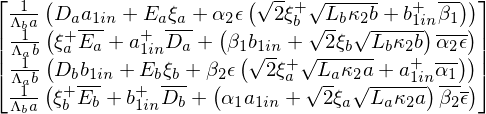

In [7]:
alpha1,beta1,alpha2,beta2,Da,Db,Ea,Eb = symbols('\\alpha_1 \\beta_1 \\alpha_2 \\beta_2 D_a D_b E_a E_b')
thetapa,thetapb,kapa,kapb = symbols('\\theta_pa \\theta_pb \kappa_a \kappa_b')
aout = Matrix([1/(Lba)*(Da*a1in+Ea*xia+alpha2*eps*(conjugate(beta1)*bd1in+sqrt(2*kap2b*Lb)*xidb)),\
               1/(Lab)*(conjugate(Da)*ad1in+conjugate(Ea)*xida+\
                        conjugate(alpha2)*conjugate(eps)*(beta1*b1in+sqrt(2*kap2b*Lb)*xib)),\
               1/(Lab)*(Db*b1in+Eb*xib+beta2*eps*(conjugate(alpha1)*ad1in+sqrt(2*kap2a*La)*xida)),\
               1/(Lba)*(conjugate(Db)*bd1in+conjugate(Eb)*xidb+\
                        conjugate(beta2)*conjugate(eps)*(alpha1*a1in+sqrt(2*kap2a*La)*xia))])
aout

## Quadrature variances

The quadratures of the two modes are:
$$\begin{align}
\frop{X}_{\mu,\theta^\prime_\mu}&=\frac{1}{2}\lk\frop{\mu}e^{-i\thetap_\mu/2}+\frop{\mu}^\dagger e^{i\thetap_\mu/2}\rk\\
\frop{Y}_{\mu,\theta^\prime_\mu}&=\frac{1}{2i}\lk\frop{\mu}e^{-i\thetap_\mu/2}-\frop{\mu}^\dagger e^{i\thetap_\mu/2}\rk
\end{align}$$
The generalized quadratures involve both modes:
$$\begin{align}
\frop{X}^G_{\thetap} &= \lk \frop{X}_{a,\thetap_a}+\frop{X}_{b,\thetap_b}\rk\\
\frop{Y}^G_{\thetap} &= \lk \frop{Y}_{a,\thetap_a}- \frop{Y}_{b,\thetap_b}\rk
\end{align}$$
For two-party, two-mode entanglement, the following condition must be satisfied for separability of any CV state (PRL 84:2722 (2000)):
$$\left\langle\lsz\Delta\frop{X}^G_{\thetap}\rsz^2\right\rangle+\left\langle\lsz\Delta\frop{Y}^G_{\thetap}\rsz^2\right\rangle\ge \left|\left\langle\lsz\frop{X}_{a,\thetap_a},\frop{Y}_{a,\thetap_a}\rsz\right\rangle\right|+\left|\left\langle\lsz\frop{X}_{b,\thetap_b},\frop{Y}_{b,\thetap_b}\rsz\right\rangle\right|=1$$



$$
\def\nup{\nu^\prime}
\begin{align}
\left\langle\lsz\Delta\frop{X}^G_{\thetap}\rsz^2\right\rangle+\left\langle\lsz\Delta\frop{Y}^G_{\thetap}\rsz^2\right\rangle=\\
=\frac{1}{4}\lka\left\langle\lk\frop{a}e^{-i\thetap_a/2}+\frop{a}^\dagger e^{i\thetap_a/2}+\frop{b}e^{-i\thetap_b/2}+\frop{b}^\dagger e^{i\thetap_b/2}\rk\lk\frop{a}e^{-i\thetap_a/2}+\frop{a}^\dagger e^{i\thetap_a/2}+\frop{b}e^{-i\thetap_b/2}+\frop{b}^\dagger e^{i\thetap_b/2}\rk\right\rangle-\right.\\
\left.-\left\langle\lk\frop{a}e^{-i\thetap_a/2}-\frop{a}^\dagger e^{i\thetap_a/2}-\frop{b}e^{-i\thetap_b/2}+\frop{b}^\dagger e^{i\thetap_b/2}\rk\lk\frop{a}e^{-i\thetap_a/2}-\frop{a}^\dagger e^{i\thetap_a/2}-\frop{b}e^{-i\thetap_b/2}+\frop{b}^\dagger e^{i\thetap_b/2}\rk\right\rangle\rka=\\
=\frac{1}{2}\lka\bra\frop{a}\frop{a}^\dagger\ket+\bra\frop{a}^\dagger\frop{a}\ket+\bra\frop{b}\frop{b}^\dagger\ket+\bra\frop{b}^\dagger\frop{b}\ket+\lk\bra\frop{a}\frop{b}\ket+\bra\frop{b}\frop{a}\ket\rk e^{-i\lk\thetap_a+\thetap_b\rk/2}+\lk\bra\frop{a}^\dagger\frop{b}^\dagger\ket+\bra\frop{b}^\dagger\frop{a}^\dagger\ket\rk e^{i\lk\thetap_a+\thetap_b\rk/2}\rka\\
\bra:\lsz\Delta\frop{X}^G_{\thetap}\rsz^2:\ket+\bra:\lsz\Delta\frop{Y}^G_{\thetap}\rsz^2:\ket=\frac{1}{2}\lka\bra\frop{a}^\dagger(-\nu)\frop{a}(\nup)\ket+\bra\frop{a}^\dagger(-\nup)\frop{a}(\nu)\ket+\bra\frop{b}^\dagger(-\nu)\frop{b}(\nup)\ket+\bra\frop{b}^\dagger(-\nup)\frop{b}(\nu)\ket+\\
\lsz\bra\frop{a(\nu)}\frop{b(\nup)}\ket+\bra\frop{b(\nu)}\frop{a(\nup)}\ket\rsz e^{-i\lk\thetap_a+\thetap_b\rk/2}+\lsz\bra\frop{a}^\dagger(-\nu)\frop{b}^\dagger(-\nup)\ket+\bra\frop{b}^\dagger(-\nup)\frop{a}^\dagger(-\nu)\ket\rsz e^{i\lk\thetap_a+\thetap_b\rk/2}\rka
\end{align}$$

Calculated two-mode output quadrature variances. Terms in the expectation values, when vacuum state is suggested:
$$
\def\nup{\nu^\prime}
\begin{align}
\bra\frop{a}^\dagger(-\nu)\frop{a}\lk\nup\rk\ket&=\frac{|\epsilon|^2}{\Lambda_{ab}(\nu)\Lambda_{ba}(\nup)}\alpha_2^*(-\nu)\alpha_2
\lk\nup\rk\lk\beta_1(\nu)\beta_1^*\lk-\nup\rk+2L_b\kappa_{2,b}\rk\delta\lk\nu+\nup\rk=\\
&=|\epsilon|^2\frac{\left|\alpha_2(-\nu)\right|^2}{\left|\Lambda_{ab}(\nu)\right|^2}
\lk\left|\beta_1(\nu)\right|^2+2L_b\kappa_{2,b}\rk\delta\lk\nu+\nup\rk\\
\bra\frop{a}^\dagger(-\nup)\frop{a}\lk\nu\rk\ket&=\frac{|\epsilon|^2}{\Lambda_{ab}(\nup)\Lambda_{ba}(\nu)}\alpha_2^*(-\nup)\alpha_2
\lk\nu\rk\lk\beta_1(\nup)\beta_1^*\lk-\nu\rk+2L_b\kappa_{2,b}\rk\delta\lk\nu+\nup\rk=\\
&=|\epsilon|^2\frac{\left|\alpha_2(\nu)\right|^2}{\left|\Lambda_{ba}(\nu)\right|^2}
\lk\left|\beta_1(-\nu)\right|^2+2L_b\kappa_{2,b}\rk\delta\lk\nu+\nup\rk\\
\bra\frop{b}^\dagger(-\nu)\frop{b}\lk\nup\rk\ket&=|\epsilon|^2\frac{\left|\beta_2(-\nu)\right|^2}{\left|\Lambda_{ba}(\nu)\right|^2}
\lk\left|\alpha_1(\nu)\right|^2+2L_a\kappa_{2,a}\rk\delta\lk\nu+\nup\rk\\
\bra\frop{b}^\dagger(-\nup)\frop{b}\lk\nu\rk\ket&=|\epsilon|^2\frac{\left|\beta_2(\nu)\right|^2}{\left|\Lambda_{ab}(\nu)\right|^2}
\lk\left|\alpha_1(-\nu)\right|^2+2L_a\kappa_{2,a}\rk\delta\lk\nu+\nup\rk\\
\bra\frop{a}(\nu)\frop{b}\lk\nup\rk\ket&=\frac{\epsilon}{\Lambda_{ba}(\nu)\Lambda_{ab}\lk\nup\rk}\beta_2\lk\nup\rk
\lk D_a(\nu)\alpha_1^*\lk-\nup\rk+\sqrt{2L_a\kappa_{2,a}}E_a(\nu)\rk\delta\lk\nu+\nup\rk=\\
&=\epsilon\frac{\beta_2(-\nu)}{\left|\Lambda_{ba}(\nu)\right|^2}
\lk D_a(\nu)\alpha_1^*\lk\nu\rk+\sqrt{2L_a\kappa_{2,a}}E_a(\nu)\rk\delta\lk\nu+\nup\rk\\
\bra\frop{b}(\nu)\frop{a}\lk\nup\rk\ket&=\epsilon\frac{\alpha_2(-\nu)}{\left|\Lambda_{ab}(\nu)\right|^2}
\lk D_b(\nu)\beta_1^*\lk\nu\rk+\sqrt{2L_b\kappa_{2,b}}E_b(\nu)\rk\delta\lk\nu+\nup\rk\\
\bra\frop{a}^\dagger(-\nu)\frop{b}^\dagger\lk-\nup\rk\ket&=\frac{\epsilon^*}{\Lambda_{ab}(\nu)\Lambda_{ba}\lk\nup\rk}\alpha^*_2\lk-\nu\rk
\lk \beta_1(\nu) D^*_b\lk-\nup\rk+\sqrt{2L_b\kappa_{2,b}}E_b^*\lk-\nup\rk\rk\delta\lk\nu+\nup\rk=\\
&=\epsilon^*\frac{\alpha^*_2(-\nu)}{\left|\Lambda_{ab}(\nu)\right|^2}
\lk D^*_b(\nu)\beta_1\lk\nu\rk+\sqrt{2L_b\kappa_{2,b}}E_b^*(\nu)\rk\delta\lk\nu+\nup\rk=\\
&=\bra\frop{b}(\nu)\frop{a}\lk\nup\rk\ket^*\\
\bra\frop{b}^\dagger(-\nu)\frop{a}^\dagger\lk-\nup\rk\ket&=\epsilon^*\frac{\beta^*_2(-\nu)}{\left|\Lambda_{ba}(\nu)\right|^2}
\lk D^*_a(\nu)\alpha_1\lk\nu\rk+\sqrt{2L_a\kappa_{2,a}}E_a^*(\nu)\rk\delta\lk\nu+\nup\rk=\\
&=\bra\frop{a}(\nu)\frop{b}\lk\nup\rk\ket^*
\end{align}$$

The required expectation value:
$$\begin{align}
&\bra:\lk\lsz\Delta\frop{X}^G_{\thetap}\rsz^2+\lsz\Delta\frop{Y}^G_{\thetap}\rsz^2\rk:\ket = \\
&=|\epsilon|\lka\frac{1}{\left|\Lambda_{ab}(\nu)\right|^2}\lsz \Re\lk\overbrace{e^{i\lk\theta-\frac{\thetap_a+\thetap_b}{2}\rk}\alpha_2(-\nu)\lsz D_b(\nu)\beta_1^*(\nu)+\sqrt{2L_b\kappa_{2,b}}E_b(\nu)\rsz}^{M_{ba}(\nu)}\rk+\right.\right.\\
&\left.\left.+\overbrace{\frac{|\epsilon|}{2}\cdot\lk\left|\alpha_2(-\nu)\right|^2\lsz\left|\beta_1(\nu)\right|^2+2L_b\kappa_{2,b}\rsz+\left|\beta_2(\nu)\right|^2\lsz\left|\alpha_1(-\nu)\right|^2+2L_a\kappa_{2,a}\rsz\rk}^{N_{ba}(\nu)}\rsz\right.+\\
&\quad\quad +\left.\frac{1}{\left|\Lambda_{ba}(\nu)\right|^2}\lsz \Re\lk e^{i\lk\theta-\frac{\thetap_a+\thetap_b}{2}\rk}
\beta_2(-\nu)\lsz D_a(\nu)\alpha_1^*(\nu)+\sqrt{2L_a\kappa_{2,a}}E_a(\nu)\rsz\rk+\right.\right.\\
&\quad\quad\left.\left.+\frac{|\epsilon|}{2}\cdot\lk\left|\beta_2(-\nu)\right|^2\lsz\left|\alpha_1(\nu)\right|^2+2L_a\kappa_{2,a}\rsz+\left|\alpha_2(\nu)\right|^2\lsz\left|\beta_1(-\nu)\right|^2+2L_b\kappa_{2,b}\rsz\rk\rsz\rka\delta\lk\nu+\nup\rk=\\
&=|\epsilon|\lka\frac{\Re\lk M_{ba}(\nu)\rk+N_{ba}(\nu)}{\left|\Lambda_{ab}(\nu)\right|^2}+\frac{\Re\lk M_{ab}(\nu)\rk+N_{ab}(\nu)}{\left|\Lambda_{ba}(\nu)\right|^2}\rka\delta\lk\nu+\nup\rk
\end{align}$$


## Numerical calculations

Here I set the appropriate parameters and calculate the general quadrature variance in the units of dB.

In [21]:
from pylab import *
import numpy as np

colors={'brown':(200/255.,154/255.,125/255.),\
		'green':(0,151/255.,78/255.),\
		'blue':(0,120/255.,180/255.),\
		'yellow':(1., 215/255., 0),\
		'black':(0.,0.,0.)}
collab = ['brown','green','blue','yellow','black']
linewidth = [2,2,3,3,4]
linestyle = ['solid','dashed','dashdot','dotted','solid']

#function which determines the quadrature correlations of a NDPA for a set of parameters
def quadr_spec(kapa=20.,kapb=20.,dela=0.,ra=0.0000000001,rb=0.0000000001,kta=0.,ktb=0.,phia=0.,phib=0.,La=100.,Lb=100.,\
               theta=0,thetapa=-pi,thetapb=pi,x=1.,nui=-25.,nuf=25.,N=20):
    
    ### PARAMETERS ####
    #Most of the parameters are given without the constant pi or 2pi.
    kapa = kapa*2.*pi       #\kappa_a (overall coupling for mode a)
    kapb = kapb*2.*pi       #\kappa_b (overall coupling for mode b)
    theta = theta*pi        #\theta (coherent pump phase)
    thetapa = thetapa*pi    #\theta^\prime_a (local oscillator phase for mode a)
    thetapb = thetapb*pi    #\theta^\prime_b (local oscillator phase for mode b)
    phia = phia*pi          #\phi_a (overall phase shift for mode a)
    phib = phib*pi          #\phi_b (overall phase shift for mode b)
    N = N*1000 +1           #resolution of frequencies
    
    #Frequency range initialization (nui:min, nuf:max, N:number of points)
    nu = linspace(nui*2.*pi,nuf*2.*pi,N)
    
    #Parameters calculated from the input parameters
    eps = x*kapa*exp(1j*theta)                #\epsilon (the coherent pump amplitude)
    Del = kapa*dela                           #\Delta (detuning of modes a, same as for b but in the opposite direction)
    ta   = kta/kapa                           #\tau_a (time delay in mode a)
    tb   = ktb/kapb                           #\tau_b (time delay in mode b)
    kap1a = kapa * ra                         #\kappa_{1,a} (coupling on the right hand side in mode a)
    kap1b = kapb * rb                         #\kappa_{1,b} (coupling on the right hand side in mode b)
    kap2a = kapa * (1-ra)                     #\kappa_{2,a} (coupling on the left hand side in mode a)
    kap2b = kapb * (1-rb)                     #\kappa_{2,b} (coupling on the left hand side in mode b)
    ka = 2*sqrt(ra*(1-ra)*(1-La/100.))*kapa    #k_a (feedback strength in mode a)
    kb = 2*sqrt(rb*(1-rb)*(1-Lb/100.))*kapb    #k_b (feedback strength in mode b)
    
    ### EXPRESSIONS ###
    Ema = np.exp(1j*(-nu*ta+phia))
    Emb = np.exp(1j*(-nu*tb+phib))
    Epa = np.exp(1j*(nu*ta+phia))
    Epb = np.exp(1j*(nu*tb+phib))
    dma = kapa-1j*(nu-Del) + ka*Epa         #d_{-,a}(\nu)
    dmb = kapb-1j*(nu+Del) + kb*Epb         #d_{-,b}(\nu)
    dpa = kapa-1j*(nu+Del) + ka*conj(Ema)   #d_{+,a}(\nu)
    dpb = kapb-1j*(nu-Del) + kb*conj(Emb)   #d_{+,b}(\nu)
    Lab = abs(eps)**2 - dpa*dmb          #\Lambda_{ab}(\nu)
    Lba = abs(eps)**2 - dpb*dma          #\Lambda_{ba}(\nu)
    
    alpha1p = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Epa   #\alpha_1(\nu)
    alpha2p = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Epa   #\alpha_2(\nu)
    beta1p  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Epb   #\beta_1(\nu)
    beta2p  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Epb   #\beta_2(\nu)
    alpha1m = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Ema   #\alpha_1(-\nu)
    alpha2m = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Ema   #\alpha_2(-\nu)
    beta1m  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Emb   #\beta_1(-\nu)
    beta2m  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Emb   #\beta_2(-\nu)
    
    Da  = sqrt(1-La/100.)*Lba*Epa+dpb*alpha1p*alpha2p
    Db  = sqrt(1-Lb/100.)*Lab*Epb+dpa*beta1p*beta2p
    Ea  = sqrt(La/100.)*(sqrt(2*kap2a)*dpb*alpha2p+Lba)
    Eb  = sqrt(Lb/100.)*(sqrt(2*kap2b)*dpa*beta2p+Lab)
    Mba = exp(1j*(theta-(thetapa+thetapb)/2))*alpha2m*(Db*np.conj(beta1p)+sqrt(2*Lb/100.*kap2b)*Eb)
    Mab = exp(1j*(theta-(thetapa+thetapb)/2))*beta2m*(Da*np.conj(alpha1p)+sqrt(2*La/100.*kap2a)*Ea)
    Nba = abs(eps)/2.*(np.abs(alpha2m)**2*(np.abs(beta1p)**2+2*Lb/100.*kap2b)+\
                    np.abs(beta2p)**2*(np.abs(alpha1m)**2+2*La/100.*kap2a))
    Nab = abs(eps)/2.*(np.abs(beta2m)**2*(np.abs(alpha1p)**2+2*La/100.*kap2a)+\
                    np.abs(alpha2p)**2*(np.abs(beta1m)**2+2*Lb/100.*kap2b))
    
    ### CORRELATIONS ###
    ncorr = abs(eps)*(1/np.abs(Lab)**2*(np.real(Mba)+Nba)+1/np.abs(Lba)**2*(np.real(Mab)+Nab))   #(normalized)
    Sout  = 10*np.log10(1+ncorr)
    So_th = 10*np.log10(1+4*eps*kap1a/((eps-kapa)**2+nu**2))
    So_os = 10*np.log10(1+4*eps*kapa/((eps-kapa)**2+nu**2))
    
    ### FIGURES ###
    #Correlations compared to the non-correlated case in dB
    
    fsfont = {'fontname':'FreeSerif'}
    colors={'brown':(200/255.,154/255.,125/255.),\
            'green':(0,151/255.,78/255.),\
            'blue':(0,120/255.,180/255.),\
            'yellow':(1., 215/255., 0),\
            'black':(0.,0.,0.)}
    collab = ['brown','green','blue','yellow','black']
    linewidth = [2,2,3,3,4]
    linestyle = ['solid','dashed','dashdot','dotted','solid']

    figure(1)
    plot(nu/2/np.pi,Sout,linewidth=2.0,color=colors['brown'])
    hold(True)
    plot(nu/2/np.pi,So_th,linewidth=4.0,color=colors['yellow'],linestyle='dashed')
    plot(nu/2/np.pi,So_os,linewidth=3.0,color=colors['green'],linestyle='dotted')
    xlabel('$\\nu$ (MHz)',fontsize = 50.,**fsfont)
    ylabel('$S_{out,\\theta^\prime}(\\nu)$',fontsize = 50.,**fsfont)
    xticks(fontsize = 30.,**fsfont)
    yticks(fontsize = 30.,**fsfont)
    xlim(nui,nuf)
    #ylim(-15,0)
    grid(True)
#    show()
    
#   Denominator |\Lambda_{ab}(\nu)|^2 as a function of the frequency
    #figure(2)
    #plot(nu/2/np.pi,np.abs(Lab)**2,linewidth=2.0)
    #xlabel('$\\nu$(MHz)',fontsize = 20.)
    #ylabel('$\Lambda_{ab}(\\nu)(MHz^2)$',fontsize = 20.)
    #xlim(-10,0)
    #ylim(0,2*10**7)
    #grid(True)
#    show()

#   Corr
#    figure(2)
#    plot(nu/2/np.pi,ncorr,linewidth=2.0)
#    xlabel('$\\nu$(MHz)',fontsize = 20.)
#    ylabel('$\Lambda_{ab}(\\nu)(MHz^2)$',fontsize = 20.)
#    xlim(-10,-6)
    #ylim(0,2*10**7)
#    grid(True)
#    show()

In [9]:
#quadr_spec(kapa=20.,kapb=20.,dela=0.,ra=0.0000000001,rb=0.0000000001,kta=0.,ktb=0.,phia=0.,phib=0.,La=100.,Lb=100.,\
#               theta=0,thetapa=-pi,thetapb=pi,x=1.,nui=-25.,nuf=25.,N=20)
fsfont = {'fontname':'FreeSerif'}

#plt.subplot(1,3,1)
figure(1)
#plt.title('(a) $\Delta = 0$',fontsize = 30.0,**fsfont)
quadr_spec(10.,2.5,0.1,0.5,0.75,4.65,0.403,0.,0.04,10.,10.,\
               1,0,0,0.4,-25.,25.,200)
#plt.subplot(1,3,2)
#plt.title('(b) $\Delta = 0.4\kappa_a$',fontsize = 30.0,**fsfont)
#quadr_spec(10.,2.5,0.4,0.00001,0.00001,0.,0.,0,0,0.,0.,\
#               1,0,0,0.5,-25.,25.,200)
#plt.subplot(1,3,3)
#plt.title('(c) $\Delta = 0.8\kappa_a$',fontsize = 30.0,**fsfont)
#quadr_spec(10.,2.5,0.8,0.00001,0.00001,0.,0.,0,0,0.,0.,\
#               1,0,0,0.5,-25.,25.,200)
plt.show()

/home/nnem614/Documents/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


### Comparison with existing literature

* P. Drummond, M. Reid, PRA **41** 3930 (1990)

  It uses operators rotating with different frequencies. In our case they are in the frame rotating by $\omega_p/2$ (see equation 2.12). We obtain symmetric spectrum BUT:
  - only max 50% squeezing if degenerate frequencies with different polarization in their case, whereas here perfect two-mode squeezing is possible.
  
  
* Z. Y. Ou, S. F. Pereira, and H. J. Kimble, Appl.Phys.B **55** 265 (1992)
  
  - Good agreement of analytical results, when there is no feedback ($\kappa_a=\kappa_b=\kappa_{2,a}=\kappa_{2,b}=\frac{\gamma}{2}$ with $L_a=L_b=1$ and $\kappa_{1,a}=\kappa_{1,b}=0$)\\
  - plotted comparison
  

## Stability analysis


In order to determine the stability of the system, the equation of motion can be rearranged in the following way:
\begin{align}
\frac{d}{dt}\ul{X} &= -\dul{\Delta}_X\ul{X}(t)-\dul{K}\,\dul{\Phi}\,\ul{X}_\tau(t)\\
\ul{X}(t) &= \lka X_{a,\theta}(t),Y_{a,\theta}(t),X_{b,\theta}(t),Y_{b,\theta}(t)\rka\\
\dul{\Delta}_X &= \left(\begin{matrix} 
\kappa_a & -\Delta & -|\epsilon| & 0 \\
\Delta & \kappa_a & 0 & |\epsilon| \\
-|\epsilon| & 0 & \kappa_b & \Delta \\
0 & |\epsilon| & -\Delta & \kappa_b\end{matrix}\right)\\
\ul{X}_\tau(t) &= \lka X_{a,\theta}(t-\tau_a),Y_{a,\theta}(t-\tau_a),X_{b,\theta}(t-\tau_b),Y_{b,\theta}(t-\tau_b)\rka\\
\dul{\Phi} &=\left(\begin{matrix} 
\cos{\phi_a} & -\sin{\phi_a} & 0 & 0 \\
\sin{\phi_a} & \cos{\phi_a} & 0 & 0 \\
0 & 0 & \cos{\phi_b} & -\sin{\phi_b} \\
0 & 0 & \sin{\phi_b} & \cos{\phi_b}\end{matrix}\right)
\end{align}

The behaviour close to the steady states can be described by suggesting exponential time-evolution $(X_i(t) = X_i(0)e^{\lambda t},Y_i(t) = Y_i(0)e^{\lambda t})$. Then the following should be satisfied:

\begin{align}
\left(\begin{matrix} 
\overbrace{\lk\lambda+\kappa_a+k_a\cos{\phi_a}e^{-\lambda\tau_a}\rk}^{R_a(\nu)} & -\overbrace{\lk\Delta+k_a\sin{\phi_a}e^{-\lambda\tau_a}\rk}^{I_a(\nu)} & -|\epsilon| & 0 \\
\lk\Delta+k_a\sin{\phi_a}e^{-\lambda\tau_a}\rk & \lk\lambda+\kappa_a+k_a\cos{\phi_a}e^{-\lambda\tau_a}\rk & 0 & |\epsilon| \\
-|\epsilon| & 0 & \overbrace{\lk\lambda+\kappa_b+k_b\cos{\phi_b}e^{-\lambda\tau_b}\rk}^{R_b(\nu)} & \overbrace{\lk\Delta-k_b\sin{\phi_b}e^{-\lambda\tau_b}\rk}^{I_b(\nu)} \\
0 & |\epsilon| & -\lk\Delta-k_b\sin{\phi_b}e^{-\lambda\tau_b}\rk & \lk\lambda+\kappa_b+k_b\cos{\phi_b}e^{-\lambda\tau_b}\rk\end{matrix}\right)\,\left(\begin{matrix}\tilde{X}_a\\\tilde{Y}_a\\\tilde{X}_b\\\tilde{Y}_b \end{matrix}\right)=0
\end{align}

In [10]:
from sympy import *
import numpy as np
from IPython.display import display, Math, Latex
init_printing(use_unicode=True)

Ra,Ia,Rb,Ib,eps = symbols('R_a I_a R_b I_b |\epsilon|')

Stab = Matrix([[Ra,-Ia,-eps,0],\
               [Ia,Ra,0,eps],\
              [-eps,0,Rb,Ib],\
              [0,eps,-Ib,Rb]])
Stab.det()

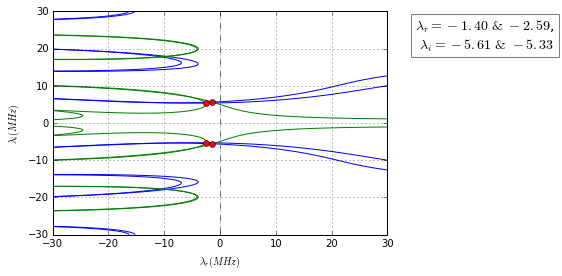

In [22]:
%matplotlib inline
from pylab import *
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

def NDPA_stab(kapap, ra, La, phiap, ktaua, delta, kapbp, rb, Lb, phibp, ktaub, x,fig):
    ## Stability of and NDPA system ##
    
    ## Parameters ##
    kapa  = kapap*2*pi
    ka    = 2*sqrt(ra*(1-ra)*(1-La/100.))*kapa
    phia  = phiap*pi
    ta    = ktaua/kapa
    Del   = delta*kapa
    kapb  = kapbp*2*pi
    kb    = 2*sqrt(rb*(1-rb)*(1-Lb/100.))*kapb
    phib  = phibp*pi
    tb    = ktaub/kapa
    eps   = x*kapa
    
    ## Functions ##
    def Ra(lambr,lambi):
        return lambr+1j*lambi*2*pi+kapa+ka*cos(phia)*exp(-(1j*2*np.pi*lambi+lambr)*ta)
    def Ia(lambr,lambi):
        return Del+ka*sin(phia)*exp(-(1j*2*np.pi*lambi+lambr)*ta)
    def Rb(lambr,lambi):
        return lambr+1j*lambi*2*pi+kapb+kb*cos(phib)*exp(-(1j*2*np.pi*lambi+lambr)*tb)
    def Ib(lambr,lambi):
        return Del-kb*sin(phib)*exp(-(1j*2*np.pi*lambi+lambr)*tb)
    
    ## Equations ##
    def eq1(lambr, lambi):
        return (Ra(lambr,lambi)+1j*Ia(lambr,lambi))*(Rb(lambr,lambi)+1j*Ib(lambr,lambi)) - eps**2
    def equation1(l):
        equations = [np.real(eq1(l[0],l[1]))]
        equations.append(np.imag(eq1(l[0],l[1])))
        return equations
    def eq2(lambr, lambi):
        return (Ra(lambr,lambi)-1j*Ia(lambr,lambi))*(Rb(lambr,lambi)-1j*Ib(lambr,lambi)) - eps**2
    def equation2(l):
        equations = [np.real(eq2(l[0],l[1]))]
        equations.append(np.imag(eq2(l[0],l[1])))
        return equations

    
    ## Grid ##
    lr = np.linspace(-30,30,200)
    li = np.linspace(-30,30,200)
    lr,li = np.meshgrid(lr,li)
    
    ## Solving the equations ##
    lamb1 = np.zeros(2)
    lamb2 = np.zeros(2)
    lamb1 = fsolve(equation1,[10,1])
    lamb2 = fsolve(equation2,[10,1])
    lambr = np.array([lamb1[0],lamb1[0],lamb2[0],lamb2[0]])
    lambi = np.array([lamb1[1],-lamb1[1],lamb2[1],-lamb2[1]])    
    
    #fig = plt.figure()
    ax = fig.axes
    plt.contour(lr,li, np.real(eq1(lr,li)),[0],colors='b')
    plt.hold(True)
    plt.contour(lr,li, np.real(eq2(lr,li)),[0],colors='b')
    plt.contour(lr,li, np.imag(eq1(lr,li)),[0],colors='g')
    plt.contour(lr,li, np.imag(eq2(lr,li)),[0],colors='g')
    plt.contour(lr,li,lr,[0],colors='grey',linestyles='dashed')
    plt.plot(lambr,lambi,'o',color = 'r')
    plt.grid(True)
    plt.xlim(-30,30)
    plt.xlabel('$\lambda_r (MHz)$')
    plt.ylabel('$\lambda_i (MHz)$')
    plt.text(35, 20, '$\lambda_r=%.2f \ &\ %.2f$,\n $\lambda_i=%.2f\ &\ %.2f$' % (lambr[0],lambr[2],lambi[0],lambi[2]),\
             fontsize=14,bbox={'facecolor':'white', 'alpha':0.5})
    #ax.xaxis.set_label_coords(1.3, -0.0015)
    #ax.yaxis.set_label_coords(-0.0015,1.3)
#    plt.show()

#def NDPA_stab(kapap, ra   , La, phiap, ktaua , delta, kapbp, rb     , Lb, phibp, ktaub , x):
figs=plt.figure()
NDPA_stab     (10.   , 0.5  , 10 , .0    ,4.65, .1    , 2.5  , .75  , 10 , 0.04    ,.403, .25,figs)

In [12]:
np.arccos(.25-1)/sqrt(1-(1-.25)**2)

# Interferometry using NDPA

## Measured quantities
* Homodyne detection with a seed field: quadrature variance $\lk\Delta\phi\rk_{hom} = \frac{\lk\Delta X^G\rk^2}{\lk\frac{\partial\left<\frop{X}^G\right>}{\partial\phi}\rk^2}$
* Photon number detection with sum or difference current $\frop{I}_\pm=\frop{a}^\dagger_{2,out}\frop{a}_{2,out}\pm\frop{b}^\dagger_{2,out}\frop{b}_{2,out}$

In our case the input field is vacuum, therefore the latter is more applicable. The phase sensitivity in that case is defined as:
\begin{align}
\lk\Delta\phi\rk_{\pm} = \frac{\lk\Delta I_{\pm}\rk^2}{\lk\frac{\partial\left<\frop{I}_{\pm}\right>}{\partial\phi}\rk^2}
\end{align}
where $\lk\Delta I_{\pm}\rk^2=\left<\frop{I}_{\pm}^2\right>-\left<\frop{I}_{\pm}\right>^2$

The phase sensitivity is given in terms of the total number of photons going through the phase shifters: 
\begin{align}
N=\left<\frop{N}\right> = \left<\frop{a}^\dagger_{1,out}\frop{a}_{1,out}+\frop{b}^\dagger_{1,out}\frop{b}_{1,out}\right>
\end{align}

In [23]:
import sympy as sym
import numpy as np
#import pylab as pl
from IPython.display import display, Math, Latex
sym.init_printing(use_unicode=True)
import sympy.utilities.autowrap as symauto

epss,Dels,nus,ta,tb,pa,pb,kappa,kappb,kas,kbs =\
sym.symbols('epsilon Delta nus ta tb pa pb kappaa kappab kas kbs',real=True)
kapp1a,kapp1b,Las,Lbs = \
sym.symbols('kappa1a kappa1b Las Lbs',real=True)

#Functions for evaluation
Ema = sym.exp(sym.I*(-nus*ta+pa))
Emb = sym.exp(sym.I*(-nus*tb+pb))
Epa = sym.exp(sym.I*(nus*ta+pa))
Epb = sym.exp(sym.I*(nus*tb+pb))
dma = kappa-sym.I*(nus-Dels) + kas*Epa         #d_{-,a}(\nu)
dmb = kappb-sym.I*(nus+Dels) + kbs*Epb         #d_{-,b}(\nu)
dpa = kappa-sym.I*(nus+Dels) + kas*sym.conjugate(Ema)   #d_{+,a}(\nu)
dpb = kappb-sym.I*(nus-Dels) + kbs*sym.conjugate(Emb)   #d_{+,b}(\nu)
Lab = sym.Abs(epss)**2 - dpa*dmb          #\Lambda_{ab}(\nu)
Lba = sym.Abs(epss)**2 - dpb*dma          #\Lambda_{ba}(\nu)

#Expectation value of the outgoing photon number
nom_ba = (kappa+kas*sym.cos(pa-nus*ta)-kapp1a*Las)*(kappb+kbs*sym.cos(pb+nus*tb))
nom_ab = (kappb+kbs*sym.cos(pb-nus*tb)-kapp1b*Lbs)*(kappa+kas*sym.cos(pa+nus*ta))
I_pexp  = 4*epss**2*(nom_ba/(Lab*sym.conjugate(Lab))+nom_ab/(Lba*sym.conjugate(Lba)))
I_mexp  = 4*epss**2*(nom_ba/(Lab*sym.conjugate(Lab))-nom_ab/(Lba*sym.conjugate(Lba)))

diffp   = sym.Rational(1,2)*(sym.diff(I_pexp,pa)-sym.diff(I_pexp,pb))
diffm   = sym.Rational(1,2)*(sym.diff(I_mexp,pa)-sym.diff(I_mexp,pb))
#display(sym.re(diffm))
#display(diffp)
derivp = sym.lambdify((nus,epss,Dels,kappa,kappb,kapp1a,kapp1b,kas,kbs,ta,tb,pa,pb,Las,Lbs), diffp, modules="numpy")
derivm = sym.lambdify((nus,epss,Dels,kappa,kappb,kapp1a,kapp1b,kas,kbs,ta,tb,pa,pb,Las,Lbs), diffm, modules="numpy")
num    = sym.lambdify((nus,epss,Dels,kappa,kappb,kapp1a,kapp1b,kas,kbs,ta,tb,pa,pb,Las,Lbs), I_pexp, modules="numpy")
#derivp = symauto.ufuncify([nu,eps,Del,kapa,kapb,kap1a,kap1b,ka,kb,ta,tb,phia,phib,La,Lb], diffp)
#derivm = symauto.ufuncify([nu,eps,Del,kapa,kapb,kap1a,kap1b,ka,kb,ta,tb,phia,phib,La,Lb], diffm)
#num    = symauto.ufuncify([nu,eps,Del,kapa,kapb,kap1a,kap1b,ka,kb,ta,tb,phia,phib,La,Lb], I_pexp)

In [2]:
sym.Rational(1,2)

/home/nnem614/Documents/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:68: RuntimeWarning: divide by zero encountered in true_divide
/home/nnem614/Documents/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:68: RuntimeWarning: invalid value encountered in true_divide


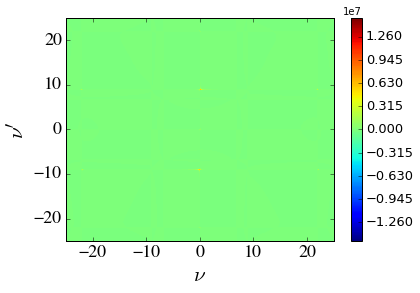

In [24]:
import numpy as np
#%matplotlib inline
import matplotlib.pyplot as plt
import scipy.integrate as integ
from IPython.core.debugger import Tracer
#Tracer()() #this one triggers the debugger

def sens(x,delta,kapa,kapb,ra,rb,kta,ktb,phia,phib,La,Lb):
# Function to determine the phase sensitivity of the setup
    import time
    start  = time.clock()

    ## Parameters from inputs ##
    kapa  = kapa*2*np.pi
    kapb  = kapb*2*np.pi
    La    = La/100.
    Lb    = Lb/100.
    phia  = phia*np.pi
    phib  = phib*np.pi
    taua  = kta/kapa
    taub  = ktb/kapa
    Del   = delta*kapa
    eps   = x*kapa
    kap1a = kapa * ra                         #\kappa_{1,a} (coupling on the right hand side in mode a)
    kap1b = kapb * rb                         #\kappa_{1,b} (coupling on the right hand side in mode b)
    kap2a = kapa * (1-ra)                     #\kappa_{2,a} (coupling on the left hand side in mode a)
    kap2b = kapb * (1-rb)                     #\kappa_{2,b} (coupling on the left hand side in mode b)

    ka = 2*np.sqrt(ra*(1-ra)*(1-La))*kapa    #k_a (feedback strength in mode a)
    kb = 2*np.sqrt(rb*(1-rb)*(1-Lb))*kapb    #k_b (feedback strength in mode b)
    
    ### EXPRESSIONS ###
    def Ei(nu,t,phi):
        if isinstance(t,str):
            display(t)
        return np.exp(1j*(nu*t+phi))
    def d(nu,t,phi,kap,Del,k):
        return kap - 1j*(nu+Del) + k*Ei(nu,t,phi)
    def Lf(nu,Del,tp,phip,kapp,kp,tm,phim,kapm,km):
        return abs(eps)**2 - d(nu,tp,phip,kapp,Del,kp)*d(nu,tm,phim,kapm,-Del,km)

    def albe(nu,t,phi,kap1,kap2,L):
        return np.sqrt(2*kap1) + np.sqrt(2*kap2*(1-L))*Ei(nu,t,phi)
    def D(nu,Del,tp,phip,kapp,kp,tm,phim,kapm,km,kap1,kap2,L):
        return np.sqrt(1-L)*Lf(nu,-Del,tp,phip,kapp,kp,tm,phim,kapm,km)*Ei(nu,tm,phim) +\
        d(nu,tp,phip,kapp,-Del,kp)*albe(nu,tm,phim,kap1,kap2,L)*albe(nu,tm,phim,kap2,kap1,L)

    def E(nu,Del,tp,phip,kapp,kp,tm,phim,kapm,km,kap1,kap2,L):
        return np.sqrt(L)*np.sqrt(2*kap2)*d(nu,tp,phip,kapp,-Del,kp)*albe(nu,tm,phim,kap2,kap1,L) +\
        Lf(nu,Del,tp,phip,kapp,kp,tm,phim,kapm,km)

    def K(nu,t,phi,kap,k,kap1,L):
        return kap + k*np.cos(phi+nu*t) - kap1*L
    
    def U(nu,nup,tp,phip,kapp,Del,kp,Lp,kap1p,kap2p,tm,phim,kapm,km,Lm,kap1m,kap2m):
        return 4*K(-nu,tp,phip,kapp,kp,kap1p,Lp)*K(nu,tm,phim,kapm,km,kap1m,0)*\
    (abs(D(nup,Del,tm,phim,kapm,km,tp,phip,kapp,kp,kap1p,kap2p,Lp))**2+\
     abs(E(nup,Del,tm,phim,kapm,km,tp,phip,kapp,kp,kap1p,kap2p,Lp))**2) -\
    np.conj(albe(-nu,tp,phip,kap2p,kap1p,Lp))*albe(-nup,tm,phim,kap2m,kap1m,Lm)*\
    (albe(nu,tm,phim,kap1m,kap2m,Lm)*np.conj(D(nu,-Del,tp,phip,kapp,kp,tm,phim,kapm,km,kap1m,kap2m,Lm))+\
    np.sqrt(2*kap2m*Lm)*np.conj(E(nu,-Del,tp,phip,kapp,kp,tm,phim,kapm,km,kap1m,kap2m,Lm)))*\
    (np.conj(albe(nup,tp,phip,kap1p,kap2p,Lp))*D(nup,Del,tm,phim,kapm,km,tp,phip,kapp,kp,kap1p,kap2p,Lp)+\
    np.sqrt(2*kap2p*Lp)*np.conj(E(nup,Del,tm,phim,kapm,km,tp,phip,kapp,kp,kap1p,kap2p,Lp)))
    
    def uncert(nu,nup):
        return np.abs(eps)**2*(U(nu,nup,taua,phia,kapa,Del,ka,La,kap1a,kap2a,taub,phib,kapb,kb,Lb,kap1b,kap2b)/\
                            (np.abs(Lf(nu,Del,taua,phia,kapa,ka,taub,phib,kapb,kb))**2*\
                            np.abs(Lf(nup,-Del,taub,phib,kapb,kb,taua,phia,kapa,ka))**2)+
                            U(nu,nup,taub,phib,kapb,-Del,kb,Lb,kap1b,kap2b,taua,phia,kapa,ka,La,kap1a,kap2a)/\
                            (np.abs(Lf(nup,Del,taua,phia,kapa,ka,taub,phib,kapb,kb))**2*\
                            np.abs(Lf(nu,-Del,taub,phib,kapb,kb,taua,phia,kapa,ka))**2))
    def denom(nu,nup):
        return derivm(nu,eps,Del,kapa,kapb,kap1a,kap1b,ka,kb,taua,taub,phia,phib,La,Lb)*\
    derivm(nup,eps,Del,kapa,kapb,kap1a,kap1b,ka,kb,taua,taub,phia,phib,La,Lb) 
    
    def N(nu):
        return num(nu,eps,Del,kapa,kapb,kap1a,kap1b,ka,kb,taua,taub,phia,phib,La,Lb) 
    
    def sens(nu,nup):
        return uncert(nu,nup)/denom(nu,nup)
    
    lims = 25.
    nu  = np.linspace(-lims,lims,1001)
    nus = np.linspace(-lims,lims,1001)
    nup = np.linspace(-lims,lims,1001)
    nu,nup = np.meshgrid(nu,nup)
    fsfont = {'fontname':'FreeSerif'}

    colors={'brown':(200/255.,154/255.,125/255.),\
        'green':(0,151/255.,78/255.),\
        'blue':(0,120/255.,180/255.),\
        'yellow':(1., 215/255., 0),\
        'black':(0.,0.,0.)}
    tickfont  = 18.
    labelfont = 21.
    titlefont = 25.
    
    plt.contourf(nu,nup,np.real(sens(2*nu*np.pi,2*nup*np.pi)),300)
    plt.xlabel("$\\nu$",**fsfont,fontsize=labelfont)
    plt.ylabel("$\\nu^\prime$",**fsfont,fontsize=labelfont)
    cb1  = plt.colorbar()
    cb1.formatter.set_powerlimits((0, 0))
    cb1.ax.tick_params(labelsize=tickfont-5)
    cb1.update_ticks()
    plt.xticks(fontsize = tickfont,**fsfont)
    plt.yticks(fontsize = tickfont,**fsfont)
#sens(x,delta,kapa,kapb,ra,rb,kta,ktb,phia,phib,La,Lb):    
sens(0.25,0.0,10,10,0.5,0.5,3.5,3.5,0,0,10,10)
plt.show()

In [22]:
var = sym.symbols('x')
sym.solve(2*sym.sqrt(var*(1-var))-.5,var)

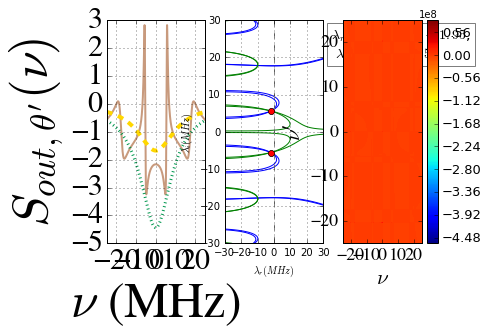

In [26]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display

def analysis(kapa=20.,kapb=20.,dela=0.,ra=0.0000000001,rb=0.0000000001,kta=0.,ktb=0.,phia=0.,phib=0.,La=100.,Lb=100.,\
               theta=0,thetapa=-1,thetapb=1,x=1.,nui=-25.,nuf=25.,N=20):
    plt.subplot(1,3,1)
    quadr_spec(kapa,kapb,dela,ra,rb,kta,ktb,phia,phib,La,Lb,theta,thetapa,thetapb,x,nui,nuf,N)
    fig=plt.subplot(1,3,2)
    NDPA_stab(kapa,ra,La,phia,kta,dela,kapb,rb,Lb,phib,ktb,x,fig)
    plt.subplot(1,3,3)
    sens(x,dela,kapa,kapb,ra,rb,kta,ktb,phia,phib,La,Lb)
    plt.show()
#def sens(x,delta,kapa,kapb,ra,rb,kta,ktb,phia,phib,La,Lb):
### SLIDERS ###
#input parameters:
kapa_slider    = widgets.FloatSlider(value = 10., min=0., max=20., step=1., description='$\kappa_a (2\pi)$')
kapb_slider    = widgets.FloatSlider(value = 2.5, min=0., max=20., step=1., description='$\kappa_b (2\pi)$')
dela_slider    = widgets.FloatSlider(value = 0.1, min=-4., max=4., step=0.01, description='$\Delta (\kappa_a)$')
ra_slider      = widgets.FloatSlider(value = 0.5, min=0., max=1., step=0.001, description='$\kappa_{1,a} (\kappa_a)$')
rb_slider      = widgets.FloatSlider(value = 0.75, min=0., max=1., step=0.001, description='$\kappa_{1,b} (\kappa_b)$')
kta_slider     = widgets.FloatSlider(value = 4.65, min=0., max=10., step=0.001, description='$\kappa_{a}\\tau_a$')
ktb_slider     = widgets.FloatSlider(value = 0.403, min=0., max=10., step=0.001, description='$\kappa_{b}\\tau_b$')
phia_slider    = widgets.FloatSlider(value = 0.0, min=0., max=2., step=0.001, description='$\phi_a (\pi)$')
phib_slider    = widgets.FloatSlider(value = 0.04, min=0., max=2., step=0.001, description='$\phi_b (\pi)$')
La_slider      = widgets.FloatSlider(value = 10., min=0., max=100., step=1., description='$L_a (\%)$')
Lb_slider      = widgets.FloatSlider(value = 10., min=0., max=100., step=1., description='$L_b (\%)$')
theta_slider   = widgets.FloatSlider(value = 1., min=-1., max=1., step=0.01, description='$\\theta (\pi)$')
thetapa_slider = widgets.FloatSlider(value = 0., min=-1., max=1., step=0.01, description='$\\theta^\prime_a (\pi)$')
thetapb_slider = widgets.FloatSlider(value = 0., min=-1., max=1., step=0.01, description='$\\theta^\prime_b (\pi)$')
x_slider       = widgets.FloatSlider(value = 0.25, min=0., max=5., step=0.01, description='$|\epsilon| (\kappa)$')
nui_fill       = widgets.FloatText(value=-25., description='Frequency min $(2\pi)$')
nuf_fill       = widgets.FloatText(value=25., description='Frequency max $(2\pi)$')
N_fill         = widgets.IntText(value=50., description='Resolution $\left(10^3 \\right)$')

#interactive setup
w = interactive(analysis,kapa=kapa_slider,kapb=kapb_slider,dela=dela_slider,\
                        ra = ra_slider,rb = rb_slider,kta = kta_slider,ktb = ktb_slider,\
                        phia = phia_slider,phib = phib_slider,La = La_slider,Lb = Lb_slider,\
                        theta = theta_slider,thetapa = thetapa_slider,thetapb = thetapb_slider,x = x_slider,\
                        nui = nui_fill, nuf = nuf_fill, N = N_fill
                       )
#show sliders
display(w)